# <span style = 'color:blue'>Tetouan Power Consumption</span>
                                                                                                  David Ugochukwu Asogwa
                                                                                                  28 August, 2022.
                                                                                                  
A study of the power consumption in Tetouan, a city in the Northern part of Morocco, with land area of approximately 10375 sq.km. and a population of about 400,000 inhabitants as of 2017 census, with an annual increase of approximately 1.78% in 2017. Since it is located along the Mediterranean Sea, its weather is mild and rainy in the winter, hot and dry during the summer months.

The power consumption data was collected from Supervisory Control and Data Acquisition System (SCADA) of Amendis which is a public service operator and in charge of the distribution of drinking water and electricity since 2002. The purpose of the electricity distribution network is to serve low and medium voltage consumers in Tetouan regions. For this purpose, the delivery and distribution of electrical energy from the point of delivery to the end user, the customer, is ensured by Amendis. The energy which is distributed comes from the National Office of Electricity and Drinking Water. After transforming the high voltage (63 kV) to medium voltage (20 kV), it is allowed to transport and distribute the energy.

With the electricity consumption being so crucial to the country, the idea is to study the impact on energy consumption. The dataset is exhaustive in its demonstration of energy consumption of the Tétouan city in Morocco. The distribution network is powered by 3 Zone stations, namely: Quads, Smir and Boussafou.

The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by 9 feature columns.
1. **Date Time**: Time window of ten minutes.
2. **Temperature**: Weather Temperature.
3. **Humidity**: Weather Humidity.
4. **Wind Speed**: Wind Speed.
5. **General Diffuse Flows**: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
6. Diffuse Flows
7. Zone 1 Power Consumption
8. Zone 2 Power Consumption
9. Zone 3 Power Consumption

Data source: https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption

In [2]:
# Import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt
from plotnine import *

%matplotlib inline
sb.set_style('darkgrid')

# Filter all warnings
import warnings
warnings.filterwarnings('ignore')

# Import data
data = pd.read_csv('powerconsumption.csv')

## <span style = 'color:blue'>Data Assessing</span>

In [2]:
# Check for null values
data.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


## <span style = 'color:blue'>Issues to resolve</span>
1. DateTime datatype is object. Change to datetime.
2. Separate DateTime into columns with day (weekday), month and year. This is te enable visualization of the power consumption for different months for the three zones.
3. Modify months from integer to names: January, February, March, etc and change data type to category.
4. Rename the following columns:
    - PowerConsumption_Zone1 to power_consumption_zone_1
    - PowerConsumption_Zone2 to power_consumption_zone_2
    - PowerConsumption_Zone3 to power_consumption_zone_3
    - WindSpeed to wind_speed
    - DiffuseFlows to diffuse_flows
    - GeneralDiffuseFlows to general_diffuse_flows
5. All column names should be lower case.

In [4]:
# Copy of original data for analysis
data_ = data.copy()

### <span style = 'color:blue'>Issue 1</span>

In [5]:
# Change datatime datatype
data_.Datetime = pd.to_datetime(data.Datetime)
print(f'The datatype for Datetime is: {data_.Datetime.dtype}')

The datatype for Datetime is: datetime64[ns]


### <span style = 'color:blue'>Issue 2</span>

In [6]:
# Feature Engineer new columns: day(weekday) and month
data_['month'] = data_.Datetime.dt.month
data_['weekday'] = data_.Datetime.dt.strftime('%A').astype('category')
data_['time'] = data_.Datetime.dt.time.astype('category')
data_.drop('Datetime', axis = 1, inplace = True)

### <span style = 'color:blue'>Issue 3</span>

In [7]:
# Rename month values
data_.month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
                     9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)
data_.month = data_.month.astype('category')
print('Data type for column month is',data_.month.dtype)

Data type for column month is category


### <span style = 'color:blue'>Issue 4</span>

In [8]:
# Rename columns
columns = {'WindSpeed':'wind_speed', 'GeneralDiffuseFlows':'general_diffuse_flows', 'DiffuseFlows':'diffuse_flows',
           'PowerConsumption_Zone1':'power_consumption_zone_1', 'PowerConsumption_Zone2':'power_consumption_zone_2',
           'PowerConsumption_Zone3':'power_consumption_zone_3',}
data_.rename(columns = columns, inplace = True)

### <span style = 'color:blue'>Issue 5</span>

In [9]:
# Column names to lower case
data_.columns = data_.columns.str.lower()

In [10]:
# First 5 row
data_.head()

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,power_consumption_zone_1,power_consumption_zone_2,power_consumption_zone_3,month,weekday,time
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,January,Sunday,00:00:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,January,Sunday,00:10:00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,January,Sunday,00:20:00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,January,Sunday,00:30:00
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,January,Sunday,00:40:00


In [11]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   temperature               52416 non-null  float64 
 1   humidity                  52416 non-null  float64 
 2   wind_speed                52416 non-null  float64 
 3   general_diffuse_flows     52416 non-null  float64 
 4   diffuse_flows             52416 non-null  float64 
 5   power_consumption_zone_1  52416 non-null  float64 
 6   power_consumption_zone_2  52416 non-null  float64 
 7   power_consumption_zone_3  52416 non-null  float64 
 8   month                     52416 non-null  category
 9   weekday                   52416 non-null  category
 10  time                      52416 non-null  category
dtypes: category(3), float64(8)
memory usage: 3.4 MB


### <span style = 'color:blue'>Saving cleaned data set</span>

In [12]:
data_.to_csv('Master_dataset.csv', index = False)

## <span style = 'color:blue'>Descriptive Statistics</span>

In [3]:
# Import master data
df = pd.read_csv('Master_dataset.csv')

In [4]:
# Descriptive Statistics
df[['temperature', 'humidity','wind_speed','power_consumption_zone_1','power_consumption_zone_2',
       'power_consumption_zone_3']].describe()

,temperature,humidity,wind_speed,power_consumption_zone_1,power_consumption_zone_2,power_consumption_zone_3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360


**From the frame above, statistical values as the mean, median (50%), minimun and maximum values and, percentiles and standard deviation can be deduced of the select columns can be deduced. Zone 1 has the maximum max_power consumption among the three supply zones with approximately 52,204 watts, and Zone 2 having the minimum max_power among the three zones with approximately 21,042 watts.**

**Taking a critical look at the mean, standard deviation and median values of the select columns above, the wind_speed column shows a huge spread due to outliers. The wind_speed has a minimum value of 0.05, median of 0.086, mean 0f 1.959 and a standard deviation of 2.349, which is strange and can only be as a result of strong outlier values with a maximum 6.483. These values will be visualized for better understanding.**

## **Exploring distributions of select features**

In [5]:
# User defined histogram plot function
def hist_plot(data, x_arg, title, x_label, y_label, bin_size, kde):
    """
    A univariate plot function that creates the histogram visualization of a feature in a dataframe using seaborn.
    
    Args:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        y_arg: y-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        bin_size: user defined bin_size. Use None for default bin_size.
        kde: Includes the kernel density. Value is either True or False.
    """
    sb.histplot(data = data, x = x_arg, bins = bin_size, kde = kde)
    plt.axvline(data[x_arg].mean(), color = 'red', linestyle = '-', linewidth = 2, label = 'Mean')
    plt.axvline(data[x_arg].median(), color = 'cyan', linestyle = ':', linewidth = 2, label = 'Median')
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 15, weight = 'bold')
    plt.ylabel(y_label, size = 15, weight = 'bold')
    plt.legend()

# User defined univariate plot function    
def box_plot(data, x_arg, title, x_label):
    """
    A univariate plot function that creates the visualization of a feature in a dataframe using the defined plot type.
    
    Args:
        data: The dataframe from where the feature is to be plotted.
        x_arg: x-axis parameter enclosed in parentheses.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
    """
    sb.boxplot(data = data, x = x_arg)
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 15, weight = 'bold')

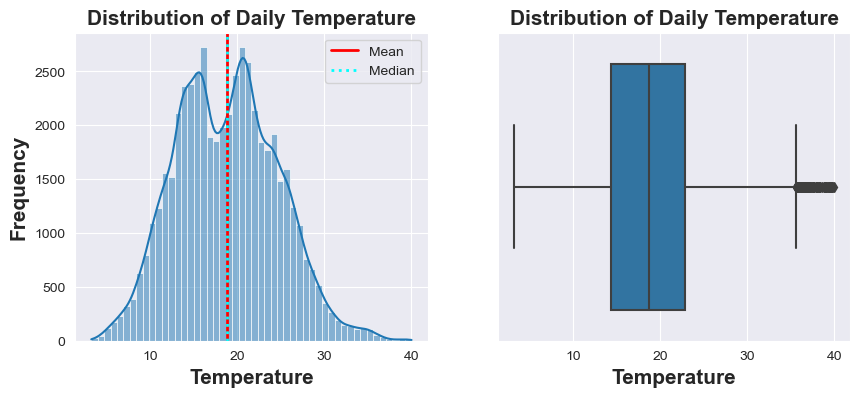

In [6]:
# Temperature distribution
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'temperature', 'Distribution of Daily Temperature', 'Temperature', 'Frequency', 50, True)

plt.subplot(1, 2, 2)
box_plot(df,'temperature', 'Distribution of Daily Temperature', 'Temperature')

**The temperature distibution have a bi-modal distribution (Histogram plot) with two peaks around 15 and 20 respectively, with the mean and median values almost aligning at the same value. Outlier values can be notice on both plots from 35 and above.**

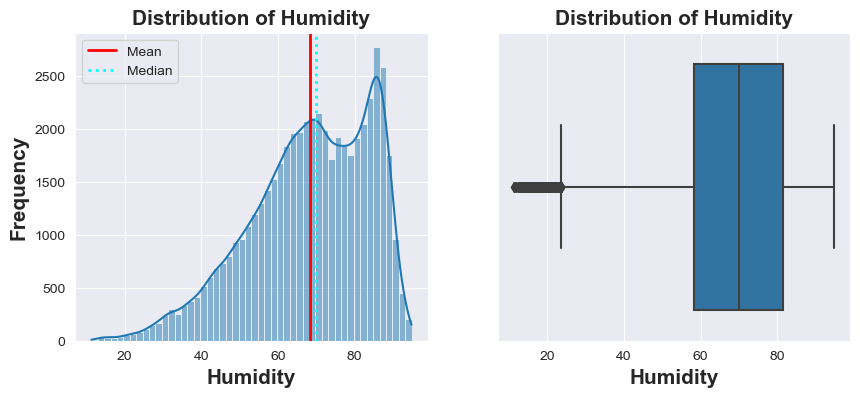

In [7]:
# Humidity distribution
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'humidity', 'Distribution of Humidity', 'Humidity', 'Frequency', 50, True)

plt.subplot(1, 2, 2)
box_plot(df,'humidity', 'Distribution of Humidity', 'Humidity')

**The humidity distribution also shows a bi-modal charatceristics with two peaks between 70 and 85 respectively. The distribution is also left skewed as it tails towards the left, showing outlier values confirmed by the boxplot. This gives the idea that the daily hunidity have more values towards the right as can be observed from the histogram and boxplot. The mean and the median can also be clearly seen from the plot.**

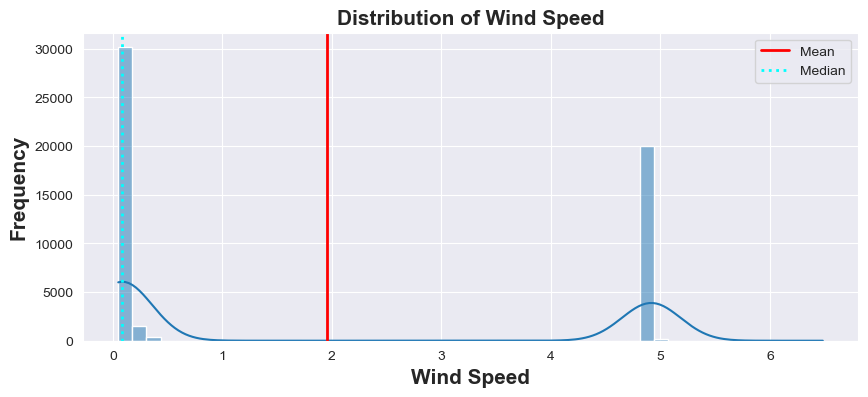

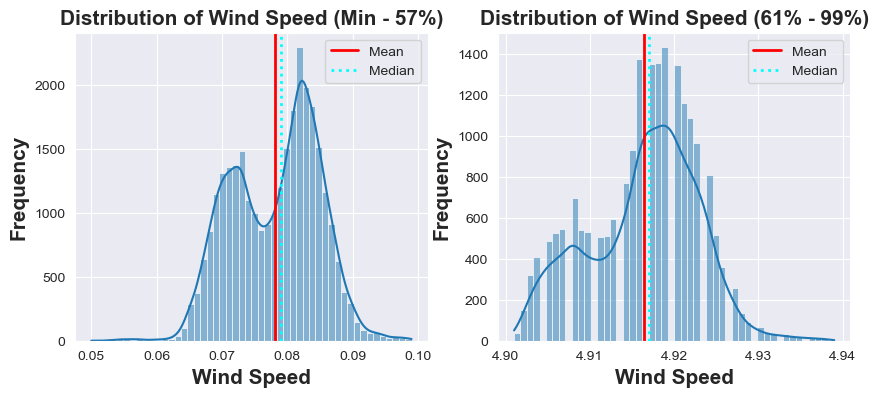

In [60]:
# Wind speed distribution
plt.figure(figsize = [10, 4])
hist_plot(df, 'wind_speed', 'Distribution of Wind Speed', 'Wind Speed', 'Frequency', 50, True)

# Removing outlier values from wind speed
# Minimum value to 57%
lower_bound = df['wind_speed'].quantile(0)
upper_bound = df['wind_speed'].quantile(0.57)
mask_speed = df['wind_speed'].between(lower_bound, upper_bound)
df_speed = df[mask_speed]

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df_speed, 'wind_speed', 'Distribution of Wind Speed (Min - 57%)', 'Wind Speed', 'Frequency', 50, True)

# 61% to 99%
lower_bound = df['wind_speed'].quantile(0.615)
upper_bound = df['wind_speed'].quantile(0.997)
mask_speed = df['wind_speed'].between(lower_bound, upper_bound)
df_speed = df[mask_speed]

plt.subplot(1, 2, 2)
hist_plot(df_speed, 'wind_speed', 'Distribution of Wind Speed (61% - 99%)', 'Wind Speed', 'Frequency', 50, True)

**The first histogram confirms our earlier assertion about having extreme outlier values in the wind_speed. Diving deeper into the wind_speed column, it was observed that majority of the data lies between values 0.05 to 0.10, and 4.90 to 4.94, as can be seen in the plots above. 57% of the dataset lies between the minimum value (0.05) and 0.10, 37% lies between 4.90 to 4.94. The remaining 5% of the data includes outlier values between 0.10 to 4.90 and above 4.94, which contains the extreme outlier values.** 

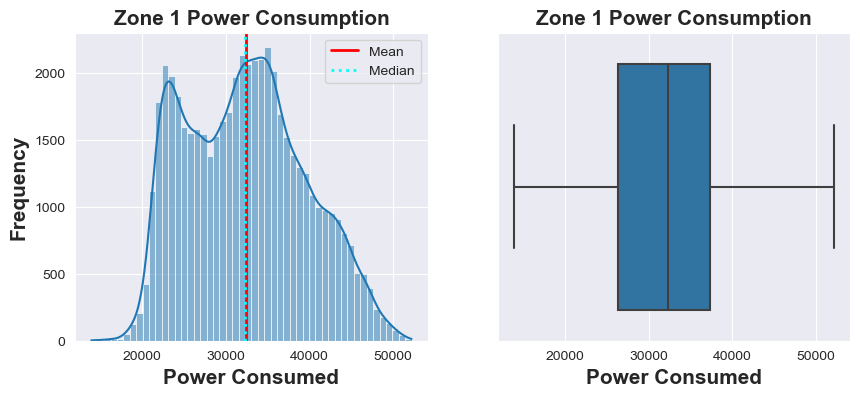

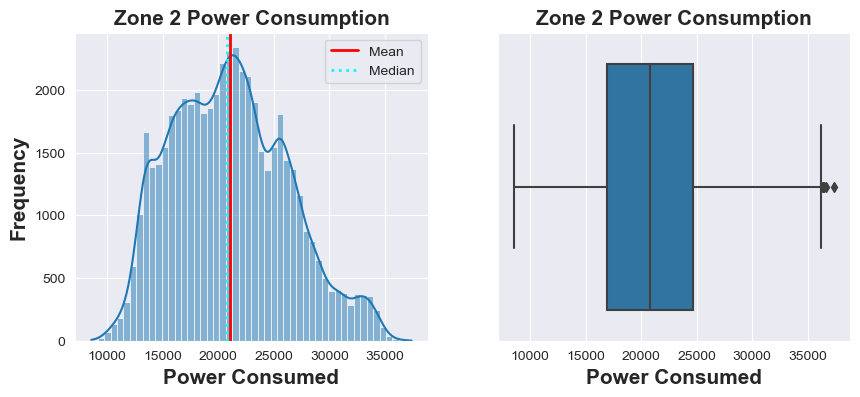

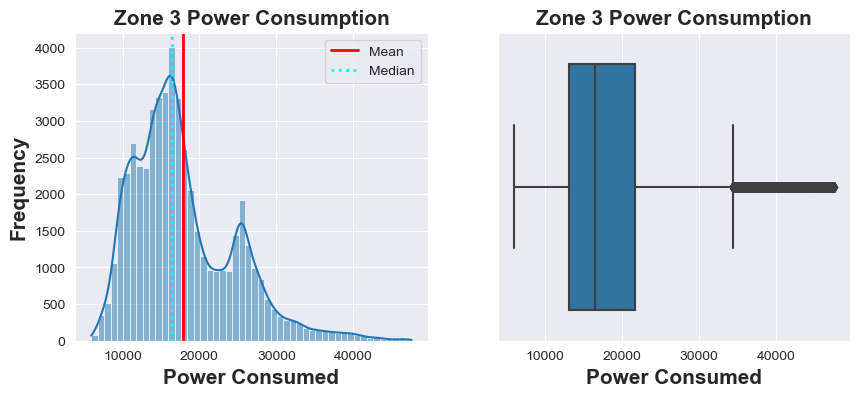

In [71]:
# Distribution of Power consumption in Zones 1, 2 and 3
#Zone 1
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'power_consumption_zone_1', 'Zone 1 Power Consumption', 'Power Consumed', 'Frequency', 50, True)
plt.subplot(1, 2, 2)
box_plot(df,'power_consumption_zone_1', 'Zone 1 Power Consumption', 'Power Consumed')

#Zone 2
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'power_consumption_zone_2', 'Zone 2 Power Consumption', 'Power Consumed', 'Frequency', 50, True)
plt.subplot(1, 2, 2)
box_plot(df,'power_consumption_zone_2', 'Zone 2 Power Consumption', 'Power Consumed')

# Zone 3
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
hist_plot(df, 'power_consumption_zone_3', 'Zone 3 Power Consumption', 'Power Consumed', 'Frequency', 50, True)
plt.subplot(1, 2, 2)
box_plot(df,'power_consumption_zone_3', 'Zone 3 Power Consumption', 'Power Consumed')

- **Zone 1 power consumption has a bi-modal distribution with first peak between 20,000 to 25,000 and the second peak between 32,000 to 38,000. The mean and median values appear to be close as evident in the descriptive statistics performed earlier. The boxplot shows no outlier values.**
- **Zone 2 power distribution has multiple peak points with the most prominnt appearing between 20,000 and 25,000. The boxplot also shows outlier values towards the maximum values, which confirms why the mean value is slightly towards the right in the histogram.**
- **Zone 3 has a unimodal ditribution with peaks at about 18,000 and 28,000. The plot is right skewed showing the existence of outlier values, confirmed by the boxplot and the mean value moving away from the median.**

In [160]:
df.quantile(.65)

temperature                    21.110000
humidity                       76.700000
wind_speed                      4.906000
general_diffuse_flows         152.400000
diffuse_flows                  60.817500
power_consumption_zone_1    35126.557380
power_consumption_zone_2    22861.785225
power_consumption_zone_3    18530.412060
Name: 0.65, dtype: float64

In [135]:
df.head()

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,power_consumption_zone_1,power_consumption_zone_2,power_consumption_zone_3,month,weekday,time
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,January,Sunday,00:00:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,January,Sunday,00:10:00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,January,Sunday,00:20:00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,January,Sunday,00:30:00
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,January,Sunday,00:40:00
